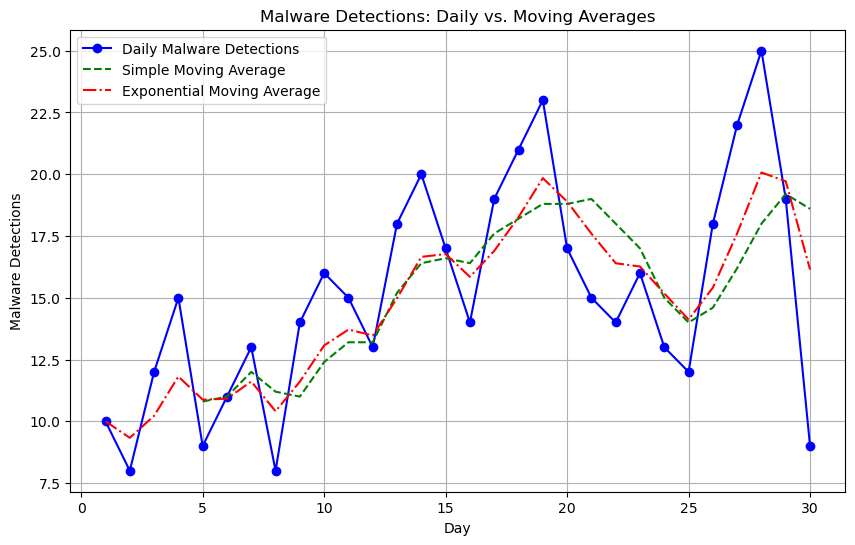

In [43]:
import pandas as pd  # A
import matplotlib.pyplot as plt  # B

# Example malware detection data
data = {'Day': range(1, 31),  # C1
        'Malware_Detections': [10, 8, 12, 15, 9, 11, 13, 8, 14, 16, 15, 13, 
                               18, 20, 17, 14, 19, 21, 23, 17, 15, 14, 16, 13, 
                               12, 18, 22, 25, 19, 9]}  # C2

df = pd.DataFrame(data)  # D

# Calculate SMA and EMA
df['SMA'] = df['Malware_Detections'].rolling(window=5).mean()  # E
df['EMA'] = df['Malware_Detections'].ewm(span=5, adjust=False).mean()  # F

# Plot the data
plt.figure(figsize=(10, 6))  # G
plt.plot(df['Day'], df['Malware_Detections'], label='Daily Malware Detections', color='blue', marker='o')  # H
plt.plot(df['Day'], df['SMA'], label='Simple Moving Average', linestyle='--', color='green')  # I
plt.plot(df['Day'], df['EMA'], label='Exponential Moving Average', linestyle='-.', color='red')  # J
plt.title('Malware Detections: Daily vs. Moving Averages')  # K
plt.xlabel('Day')  # L
plt.ylabel('Malware Detections')  # M
plt.legend()  # N
plt.grid()  # O
plt.show()  # P


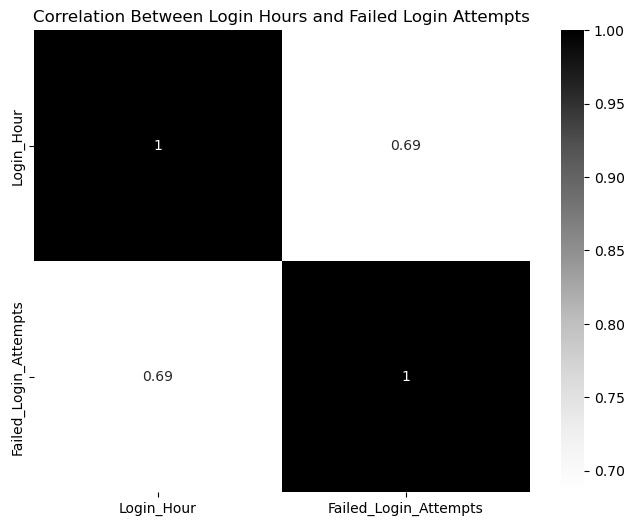

In [51]:
# Import libraries
import seaborn as sns  # A
import pandas as pd  # B
import matplotlib.pyplot as plt  # C

# Example dataset: Login hours and failed attempts
data = {'Login_Hour': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3],  # D1
        'Failed_Login_Attempts': [2, 3, 4, 5, 3, 6, 7, 5, 8, 9, 12, 13, 10, 8, 7, 5, 2, 3, 4, 5]}  # D2

df = pd.DataFrame(data)  # E

# Calculate correlation matrix
correlation_matrix = df.corr()  # F

# Plot heatmap
plt.figure(figsize=(8, 6))  # G
sns.heatmap(correlation_matrix, annot=True, cmap="Grays", cbar=True)  # H
plt.title('Correlation Between Login Hours and Failed Login Attempts')  # I
plt.show()  # J


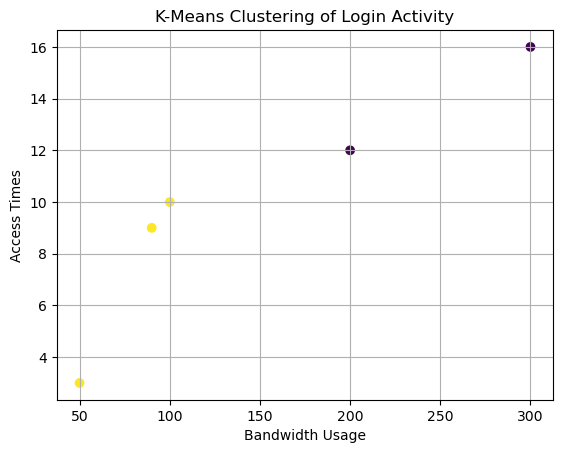

In [53]:
# Import libraries
from sklearn.cluster import KMeans  # A
import pandas as pd  # B
import matplotlib.pyplot as plt  # C

# Sample dataset: Device login activity
data = {'Device': ['Laptop_A', 'Phone_B', 'Printer_C', 'Laptop_B', 'Server_D'],  # D1
        'Bandwidth_Usage': [100, 200, 50, 90, 300],  # D2
        'Access_Times': [10, 12, 3, 9, 16]}  # D3

df = pd.DataFrame(data)  # E

# Extract features for clustering
X = df[['Bandwidth_Usage', 'Access_Times']]  # F

# Apply K-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # G
df['Cluster'] = kmeans.fit_predict(X)  # H

# Plot clusters
plt.scatter(df['Bandwidth_Usage'], df['Access_Times'], c=df['Cluster'], cmap='viridis', label='Clusters')  # I
plt.title('K-Means Clustering of Login Activity')  # J
plt.xlabel('Bandwidth Usage')  # K
plt.ylabel('Access Times')  # L
plt.grid(True)  # M
plt.show()  # N


/var/folders/dh/kcnngpm90054491_ty785j4w0000gn/T/ipykernel_59765/2603367631.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='1/1/2023', periods=12, freq='M'),  # D1
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA

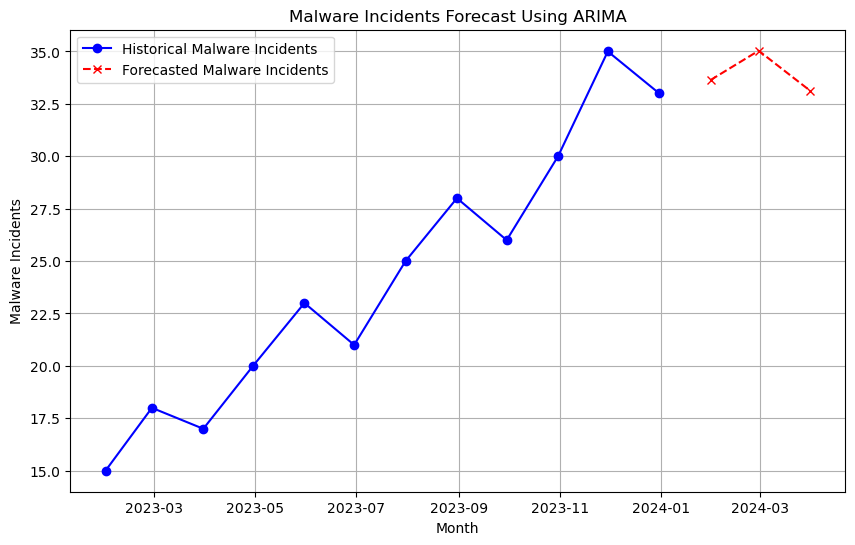

In [55]:
import pandas as pd  # A
import matplotlib.pyplot as plt  # B
from statsmodels.tsa.arima.model import ARIMA  # C

# Create a dataset for monthly malware incidents
data = {  # D
    'Month': pd.date_range(start='1/1/2023', periods=12, freq='M'),  # D1
    'Malware_Incidents': [15, 18, 17, 20, 23, 21, 25, 28, 26, 30, 35, 33]  # D2
}
df = pd.DataFrame(data)  # E
df.set_index('Month', inplace=True)  # F

# Fit an ARIMA model
model = ARIMA(df['Malware_Incidents'], order=(2, 1, 2))  # G
model_fit = model.fit()  # H

# Forecast the next 3 months
forecast = model_fit.forecast(steps=3)  # I

# Plot the data and the forecast
plt.figure(figsize=(10, 6))  # J
plt.plot(df.index, df['Malware_Incidents'], label='Historical Malware Incidents', color='blue', marker='o')  # K
plt.plot(pd.date_range(start='1/1/2024', periods=3, freq='M'), forecast, label='Forecasted Malware Incidents', color='red', linestyle='--', marker='x')  # L
plt.title('Malware Incidents Forecast Using ARIMA')  # M
plt.xlabel('Month')  # N
plt.ylabel('Malware Incidents')  # O
plt.legend()  # P
plt.grid(True)  # Q
plt.show()  # R


In [61]:
# Define the known probabilities
P_A = 0.05  # A
P_B_given_A = 0.9  # B
P_B_given_not_A = 0.1  # C

# Calculate P(B), the marginal likelihood
P_B = P_B_given_A * P_A + P_B_given_not_A * (1 - P_A)  # D

# Apply Bayes' theorem to calculate P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B  # E

# Print the result
print(f"Probability of malware infection given unusual activity: {P_A_given_B:.2%}")  # F


Probability of malware infection given unusual activity: 32.14%


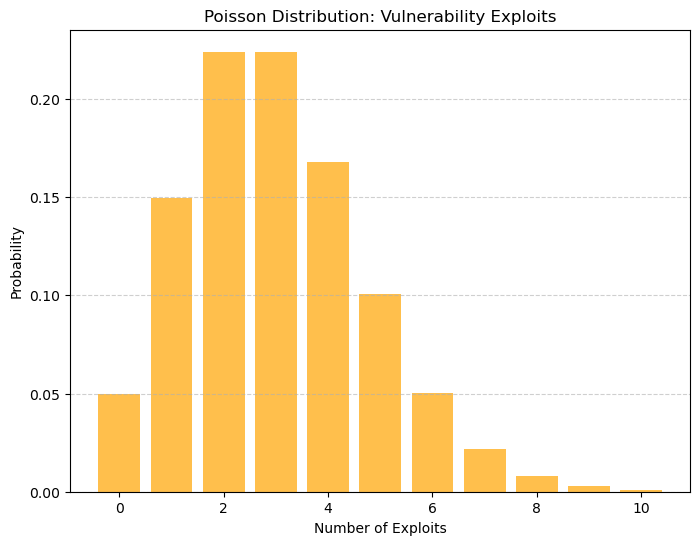

In [63]:
import numpy as np  # A
from scipy.stats import poisson  # B
import matplotlib.pyplot as plt  # C

# Average rate of vulnerability exploitation (lambda)
lambda_rate = 3  # D

# Define a range of possible outcomes (0 to 10 exploits)
x = np.arange(0, 11)  # E

# Calculate the Poisson probabilities
pmf = poisson.pmf(x, lambda_rate)  # F

# Plot the distribution
plt.figure(figsize=(8, 6))  # G
plt.bar(x, pmf, color='orange', alpha=0.7)  # H
plt.title('Poisson Distribution: Vulnerability Exploits')  # I
plt.xlabel('Number of Exploits')  # J
plt.ylabel('Probability')  # K
plt.grid(axis='y', linestyle='--', alpha=0.6)  # L
plt.show()  # M